<a href="https://colab.research.google.com/github/jeces/Ai-/blob/main/Week2_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2: 인공지능 기초 II
# 실습 #3: Titanic Dataset 분류 인공지능 학습 실습
# Titanic: Machine Learning from Disaster!
### **2023.01.13**<br/>

![Sto%CC%88wer_Titanic.jpg](https://allenginsberg.org/wp-content/uploads/2015/11/St%C3%B6wer_Titanic.jpg)

---
<br/>

***Library***

- Numpy
- Pandas
- Sklearn



In [1]:
# This is the library to use for this project.
# It must be executed very first.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [14]:
#  You should change rootpath and trainpath for your csv file path
root_path = '/content/drive'
train_path = '/content/train.csv'
test_path = '/content/test.csv'

In [15]:
# (Optional) you can mount your google drive to colab computer.
from google.colab import drive

drive.mount(root_path)

MessageError: ignored

## 1. Data analysis
$\quad$전처리 및 기계 학습 알고리즘을 적용하기 전에, 주어진 데이터가 어떻게 구성되어 있는지 이해하는 것이 중요합니다. 본 Kaggle Project에서 제시한 데이터에는 다음과 같은 정보가 포함되어 있습니다. (데이터셋 링크: https://www.kaggle.com/competitions/titanic/data?select=train.csv)
<br>
$\quad$위의 정보가 데이터에 어떻게 저장되고, 데이터가 어떻게 분배되는지 아래의 설명과 코드를 참조하세요.
<br>
<br>

In [16]:
#  Read Data
train_data = pd.read_csv(train_path);
test_data = pd.read_csv(test_path);

$\quad$첫째, 데이터를 읽습니다. 데이터에는 train.csv(훈련용)와 test.csv(테스트용)가 포함됩니다. pandas 라이브러리의 read_csv 함수를 사용하여 두 데이터 파일을 모두 읽어옵니다. 가져온 데이터는 각각 train_data 및 test_data로 지정됩니다.

<br>

$\quad$읽은 데이터에 위의 정보가 어떻게 저장되는지 확인할 필요가 있다. 아래 코드를 실행하여 train.csv와 test.csv의 부분을 확인해 봅시다. 아래의 코드는 데이터에 포함된 상위 5줄을 출력해 주는 코드입니다.

In [17]:
# read first 5 of train_data
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# read last 5 of train_data
train_data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


$\quad$train_data는 각 행에 "PassangerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Cabin", "Embarked", "Fare" 정보를 포함하고 있습니다. 여기서 "Survived"를 제외한 11개의 정보는 특성(feature)에 해당하며, "Survived"는 레이블(label)에 해당합니다.

---

<br>

"PassangerId": 승객의 식별자(identifier)

"Survived": **승객들이 살아남았는지 여부.**

"Pclass": 사회경제적 지위에 대한 프록시 (1st=Upper/2nd=Middle/3rd=Lower)

"Name": 승객 이름.

"Sex": 남성 또는 여성

"Age": 나이는 1보다 작으면 분수이다. 만약 나이가 추정된다면, 그것은 0.x의 형태로 표현된다

"SibSp": 데이터셋의 가족 관계(형제 + 배우자)를 정의합니다

"Parch": 데이터셋의 가족 관계(부모+자녀)를 정의합니다

"Ticket": 티켓 ID

"Cabin": 캐빈(선실) ID

"Embarked": 승객이 타이타닉에 탑승한 곳.

"Fare": 각 승객이 지불한 돈

<br>

In [23]:
# read first 5 of test_data
test_data.head() # survived 데이터가 없음

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
# read last 5 of test_data
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


$\quad$test_data를 보면 각 행에서 "PassangerId", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked" 등의 정보가 표시됩니다. test_data는 모델을 검증하는 데 사용되는 데이터이기 때문에 train_data와 달리 레이블에 해당하는 "Survived" 정보가 없습니다.
<br>
<br>
$\quad$우리가 볼 수 있는 한 "PassangerId"는 단순히 주문을 위해 부착하는 기능일 뿐 실제 승객이 살아있는지 판단하는 데 필요한 자료는 아니다. 그리고 "Pclass", "Age", "SipSp", "Parch", "Fare"는 수치 정보이기 때문에 전처리 없이도 머신러닝 알고리즘을 적용할 수 있다. 그러나 "이름", "Sex", "Ticket", "Cabin", "Embarked"와 같은 다른 정보는 벡터화 전에 정보를 제거하고 새로운 정보를 추출하는 것과 같은 적절한 사전 처리가 필요하다.
<br>
<br>
<br>


$\quad$이제 주어진 데이터의 분포관점에서, 생존성("Survived") 과 다른 데이터 특성(feature) 간의 관계와, 데이터를 전처리(preprocessing)하는 방법을 살펴봅시다.
<br>
<br>
$\quad$먼저 데이터에 포함된 숫자 정보의 분포를 살펴보겠습니다. 다음 코드를 실행하여 분포를 확인하십시오.

In [30]:
# Analyze numeric information of train_data
train_data.describe(percentiles=[0.25, 0.75])
#train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


$\quad$count(데이터의 갯수), mean(평균), std(표준편차), min(최소), 상위 25%, 50%, 75%, max(최대) 값이 인쇄됩니다.
<br>
<br>
$\quad$count의 경우, "PassengerId" 데이터가 891개(명)이므로 train_data는 총 891개를 포함한다. "Age"의 경우 714명이므로 177명의 승객의 나이 정보는 알 수 없습니다.
<br>
<br>
$\quad$그 다음으로 살펴볼 것은 mean(평균)입니다. 생존율은 평균 38.4%, 티켓 클래스는 2.3, 형제자매 수는 0.52명, 부모 수는 0.38명, 티켓 비용은 32.2임을 알 수 있습니다.
<br>
<br>
$\quad$다음 값은 min(최소), max(최대), 25%, 50% 및 75%입니다. 이 값들은 우리가 전체적인 분포를 이해하고 다양한 해석을 할 수 있게 해줍니다. 예를 들어 "SibSp"와 "Parch"는 상위 75%에 1~0명이 포함돼 있어 대부분의 승객이 가족 없이 혼자 탑승했다는 것을 알 수 있습니다. 그리고 "Fare"의 상위 75%가 31이었는데, max(최대)가 512이기 때문에 일부 고객들은 다른 고객들보다 훨씬 더 많은 요금을 지불했습니다. 상위 60%, 80% 등의 값을 알고 싶은 경우, 위 코드의 백분위 수 안에 있는 값을 0.25 혹은 0.75에서 0.6 혹은 0.8로 변경하여 확인할 수 있습니다.
<br>
<br>
$\quad$숫자 데이터를 제외한 다른 데이터 타입(e.g. string)의 분포는 다음 코드를 실행하여 확인할 수 있습니다:

In [ ]:
# Analyze non-numeric information of train_data
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


$\quad$위의 코드는 비숫자 정보 "Name", "Sex", "Ticket", "Cabin", "Embarked"의 분포를 보여줍니다. 출력은 **count**(갯수), **unique**(구별 가능한 정보의 수), **top**(최상위 정보) 및 **freq**(가장 빈번한 정도)입니다.
<br>
<br>
$\quad$**count**의 경우 train_data는 총 891개이므로 대부분의 정보는 891개의 값을 가집니다. 그러나 "Cabin"과 "Embarked"의 경우, 일부 정보가 누락된 것을 확인할 수 있습니다.
<br>
<br>
$\quad$**unique**의 경우 "Name"의 값은 891이므로 train_data의 모든 사용자는 다른 이름을 가진다는 사실을 알 수 있습니다. "Sex"는 남성과 여성 두 가지 경우가 있어서 2의 값을 가지고 있습니다. 티켓과 객실은 각각 681과 147이며, 같은 티켓이나 객실 번호를 가진 승객들이 있습니다. 마지막으로, 타이타닉은 출발하는 항구가 3개이기 때문에 "Embarked"는 3을 가집니다.
<br>
<br>
$\quad$**top**은 가장 일반적인 정보이고 **freq**는 해당 정보의 갯수입니다. 사람마다 "Name"이 다르기 때문에 **freq**는 1이고 **top**의 값은 의미가 없습니다. "Sex"는 577명의 남성이고, 그래서 577명의 남성과 314명의 여성 승객이 있었음을 알 수 있습니다. 그리고 "Embarked"를 보면 대부분의 승객(644명)이 S(Southampton)에서 탑승한 것을 볼 수 있습니다.
<br>
<br>
<br>
<br>
<br>
<br>
$\quad$다음으로, 우리는 각 특성(feature)이 "Survived"의 레이블(label)과 어떻게 관련되어 있는지 조사합니다.

In [38]:
# Statistics between "Pclass" and "Survived"
train_data[['Pclass', 'Age']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Age', ascending=False) # ascending 오름차순

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


첫째, "Pclass"와 "Survived"의 관계입니다. 위 코드의 결과는 티켓 등급이 높을수록 생존율이 높다는 것을 보여줍니다.

In [ ]:
# Statistics between "Sex" and "Survived"
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


여성의 생존율은 남성보다 훨씬 높습니다.

In [ ]:
# Statistics between "SibSp" and "Survived"
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


"SibSp"는 형제자매의 수입니다. 일반적으로 형제자매의 수가 적을수록 생존율이 높아집니다.

In [ ]:
# Statistics between "Parch" and "Survived"
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


"Parch"는 부모와 자녀의 수입니다. 위의 "SibSp"와 같이 숫자가 낮을수록 생존율이 높아집니다.

In [ ]:
# Statistics between "Embarked" and "Survived"
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


"Embarked"는 탑승 장소입니다. 탑승 장소가 'C'일 때 생존율이 다른 지역보다 훨씬 높고, 가장 많은 사람이 탑승한 'S'가 가장 낮습니다.

:$\quad$
"Pclass", "Sex" 및 "Embarked"는 "Survived"와 직접 관련될 수 있는 좋은 특성입니다. 또한 "Sex" 데이터를 벡터화 하고, "Embarked"의 누락된 정보를 복원 하면, 학습에 "Sex"와 "Embarked"를 사용할 수 있습니다.
<br>
<br>
$\quad$"SibSp"와 "Parch"는 위에서 살펴본 바와 같이 수가 **적을 때** 생존율이 높은 경향이 있지만 직접적인 연관성을 찾기는 어렵습니다. 따라서 숫자가 작으면(4 이하) '0', 크면(4 이상) '1'의 전처리를 적용할 수 있습니다. 둘 다 가족 구성원의 수를 나타내기 때문에 두 값을 따로 각각 사용하기보다는 두 값을 더한 값인 "FamilySize"를 사용하는 것이 바람직합니다.

## 2. Preprocessing

$\quad$먼저 "Sibsp"와 "Parch"를 합하여 "FamilySize"라는 새로운 특성데이터를 만듭니다.

In [42]:
# Read Data
preprocessing_train_data = pd.read_csv(train_path)
preprocessing_test_data = pd.read_csv(test_path)

# Add "SibSp" and "Parch" to make "FamilySize"
preprocessing_train_data['FamilySize'] = preprocessing_train_data['SibSp'] + preprocessing_train_data['Parch']  
preprocessing_test_data['FamilySize'] = preprocessing_test_data['SibSp'] + preprocessing_test_data['Parch'] 

# Delete "SibSp" abd "Parch"
preprocessing_train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
preprocessing_test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Print top 5 values
preprocessing_train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,NaN,C,1


결과적으로 "SibSp"와 "Parch"는 하나의 "FamilySize"로 결합됩니다. 이제 이 특성이 "Survived"와 어떻게 관련되어 있는지 확인하기 위해 다음 코드를 살펴보겠습니다.

In [43]:
# Statistics between "FamilySize" and "Survived"
preprocessing_train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


더 단순화하기 위해 "패밀리 크기"의 각 값이 4보다 크면 1로, 4보다 작거나 같으면 0으로 변경합니다.

In [45]:
# Divide "Family size" into 0 and 1 based on 4
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] > 4, 'FamilySize'] = 1

preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] > 4, 'FamilySize'] = 1

# Print top 5 valus
preprocessing_train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,NaN,C,0



$\quad$"Name", "Ticket", "Cabin"은 "Survived"과 직접 관련될 수 없습니다. 따라서 이 세 가지 특성은 제거할 수 있습니다.
<br>
<br>
$\quad$하지만 "Name"을 보면 'Mr', 'Mrs', 'Capt', 'Master' 등의 정보를 얻을 수 있습니다. "Name"에서 이 정보를 추출하고 새 기능 "Title"을 만듭니다. 필요한 정보를 추출한 후, 필요없는 정보인 "Name", "Ticket" 및 "Cabin" 특성을 제거합니다.

In [46]:
# Extract "Name" and create "Title"
preprocessing_train_data['Title'] = preprocessing_train_data.Name.str.extract('([A-Za-z]+)\.', expand=False)
preprocessing_test_data['Title'] = preprocessing_test_data.Name.str.extract('([A-Za-z]+)\.', expand=False)

# Delete "Name", "Ticket", "Cabin" features
preprocessing_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
preprocessing_test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Print statistics of "Title"
pd.crosstab(preprocessing_train_data['Title'], preprocessing_train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


 "Master", "Mr", "Mrs", "Ms" 이외의 "Title"은 거의 없습니다. 그래서 우리는 이러한 희귀한 타이틀을 "Rare"로 대체하고 "MS", "Mlle", "Mmn"과 같은 여성 타이틀을 "Miss"로 통합합니다. 치환 후 'Mr'을 '1'으로, 'Miss'를 '2'로, 'Mrs'를 '3'으로, 'Master'를 '4'로, 'Rare'를 '5'로 벡터화하고, 'Title'을 알 수 없는 경우 '0'으로 설정합니다. 이 작업은 아래 코드에서 수행할 수 있습니다.

In [52]:
# The rest except the main "Title" is classified as "Rare"
preprocessing_train_data['Title'].replace(['Lady', 'Countess', 'Capt','Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)  
preprocessing_test_data['Title'].replace(['Lady', 'Countess', 'Capt','Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True) 

# Unify 'Ms', 'Mlle', 'Mme' as 'Miss'
preprocessing_train_data['Title'].replace(['Ms', 'Mlle', 'Mme'], 'Miss', inplace=True)
preprocessing_test_data['Title'].replace(['Ms', 'Mlle', 'Mme'], ['Miss', 'Miss', 'Miss'], inplace=True)

# "Title" vectorization
preprocessing_train_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1, 2, 3, 4, 5], inplace=True)
preprocessing_test_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1, 2, 3, 4, 5], inplace=True)

# Set '0' for unknown "Title"
preprocessing_train_data['Title'].replace([None], [0], inplace=True)
preprocessing_test_data['Title'].replace([None], [0], inplace=True)

# Print top 5 values
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,0,1
1,2,1,1,female,38.0,71.2833,C,0,3
2,3,1,3,female,26.0,7.9250,S,0,2
3,4,1,1,female,35.0,53.1000,S,0,3
4,5,0,3,male,35.0,8.0500,S,0,1



$\quad$"Age"의 경우 누락된 데이터가 177개이며 이 데이터를 나머지 승객의 평균 연령(30세)으로 복원합니다.


In [57]:
# Restore empty part to average age
preprocessing_train_data.loc[preprocessing_train_data['Age'].isnull(), 'Age'] = round(preprocessing_train_data['Age'].mean()) #30
preprocessing_test_data.loc[preprocessing_test_data['Age'].isnull(), 'Age'] = round(preprocessing_test_data['Age'].mean()) #30

# preprocessing_train_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1,2,3,4,5], inplace=True)
# preprocessing_test_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1,2,3,4,5], inplace=True)

# preprocessing_train_data['Title'].replace([None], [0], inplace=True)
# preprocessing_test_data['Title'].replace([None], [0], inplace=True)

# preprocessing_train_data.head()
# preprocessing_test_data.head()



,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,892,3,male,34.5,7.8292,Q,0,1
1,893,3,female,47.0,7.0000,S,0,3
2,894,2,male,62.0,9.6875,Q,0,1
3,895,3,male,27.0,8.6625,S,0,1
4,896,3,female,22.0,12.2875,S,0,3


# DIY: Preprocessing

<br>
$\quad$"Sex"와 "Embarked"는 "Survived"에 직접적으로 영향을 미치는 정보입니다. 따라서 이 두 정보는 사전 처리가 필요하지 않습니다. 누락된 부분을 복원하고 벡터화를 실행하기만 하면 됩니다.
<br>
<br>
$\quad$먼저, "Embarked"의 두 개의 손실된 데이터를 복원합니다. 본 사전 처리에서는 두 개의 "Embakred" 정보를 가장 많은 승객이 탑승한 'S' 포트로 지정하고자 합니다. 그런 다음 'Sex'의 'female'을 0으로, 'male'을 1로 설정하고, 'Embarked'의 'Q', 'C', 'S'를 0, 1, 2로 각각 설정합니다. 아래 코드에서 이 작업을 수행할 수 있습니다.
<br>
<br>
$\quad$**Fill in the '???' part!**

In [59]:
# 1. Fill unknown "Embarked" to 'S'
# >> Which data do we want to edit?
# >> The unknown data is labeled as None, and we want to replace them with 'S'.
# (Hint: The code is almost same as the cell right above!!!)
preprocessing_train_data['Embarked'].replace([None], ['S'], inplace=True)
preprocessing_test_data['Embarked'].replace([None], ['S'], inplace=True)

# 2. "Embarked", "Sex" vectorization
# >> To apply Logistic regression or SVM,
#    we want to convert features that are in string format into numeric values.
# >> Let's replace 'female' --> 0, 'male' --> 1
preprocessing_train_data['Sex'].replace(['female', 'male'], [0, 1], inplace=True)
preprocessing_test_data['Sex'].replace(['female', 'male'], [0, 1], inplace=True)

# >> Now, replace 'Q' --> 0, 'C' --> 1, 'S' --> 2 in the same way!
preprocessing_train_data['Embarked'].replace(['Q', 'C', 'S'], [0, 1, 2], inplace=True)
preprocessing_test_data['Embarked'].replace(['Q', 'C', 'S'], [0, 1, 2], inplace=True)

# # >> We also need to vectorize the test set.
# # >> 'female' --> 0, 'male' --> 1
# preprocessing_test_data.replace(???)
# # >> 'Q' --> 0, 'C' --> 1, 'S' --> 2
# preprocessing_test_data.replace(???)

# Print top 5 values
preprocessing_train_data[['Sex', 'Embarked']].head()

,Sex,Embarked
0,1,2
1,0,1
2,0,2
3,0,2
4,1,2


In [60]:
# Print result        여기까지 전처리 과정이 끝남
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,1,22.0,7.2500,2,0,1
1,2,1,1,0,38.0,71.2833,1,0,3
2,3,1,3,0,26.0,7.9250,2,0,2
3,4,1,1,0,35.0,53.1000,2,0,3
4,5,0,3,1,35.0,8.0500,2,0,1


결과는 "Title", "Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize"의 7가지 특성을 포함합니다. "Age"와 "Fare"은 적절한 정규화가 필요합니다. 이 두 특성에 대해 "standardization"를 수행합니다.
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 3. Machine Learning
$\quad$이제 우리는 기계 학습 알고리즘을 전처리된 데이터에 적용합니다. 이 프로젝트에서는 'Logistic Regression'와 'SVM'을 사용할 것입니다.
<br>
<br>
$\quad$각 알고리즘을 사용하기 위해 사전 처리된 데이터에서 "Survived"와 의미 없는 "PassangerId"를 제거하여 학습 데이터를 생성하고 "Survived"만 추출하여 레이블 데이터를 생성하고(테스트 데이터에서 "PassagerId"를 제거함), 각 알고리즘을 적용하고 결과 모델로 테스트 데이터를 예측합니다. 코드는 아래와 같습니다.

In [61]:
# Creating data for training
X_train = preprocessing_train_data.drop(['Survived', 'PassengerId'], axis=1)  # Input 데이터
Y_train = preprocessing_train_data["Survived"]   # output 데이터
X_test = preprocessing_test_data.drop(['PassengerId'], axis=1)  # test데이터는 Survived 없음

Accuracy:  81.71
Area Under the Curve:  0.86


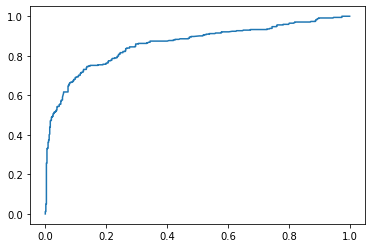

In [63]:
classifier = LogisticRegression()

# Fit the classifier to the training data
classifier.fit(X_train, Y_train)      # 학습

# Check the accuracy, AUC, and ROC curve of the classifier set above
accuracy = classifier.score(X_train, Y_train) * 100     # score함수를 이용해서 백분율로 표시
Y_train_pred = classifier.predict_proba(X_train)[:, 1]  # 예측된 y_train_pred를 뽑음

FPR, TPR, thresholds = roc_curve(Y_train, Y_train_pred) # 예측된 값을 roc_curve로 나타냄, 사각형이 될 수록 좋음
AUC = roc_auc_score(Y_train, Y_train_pred)              # 아래 그래프의 아래쪽 면적(즉 가장 좋은 형태는 면적이 가장 크면 좋음)

plt.plot(FPR, TPR)
print("Accuracy: ", "{0:.2f}".format(accuracy))
print("Area Under the Curve: ", "{0:.2f}".format(AUC))

In [65]:
# Test data prediction
predict = classifier.predict(X_test)
predict = np.round(predict)

# This is how the model predicted
result = test_data.copy()
result["PREDICTION"] = predict
result.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PREDICTION
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


# DIY: SVM classifier
$\quad$이제 SVM에서도 동일한 작업을 수행할 수 있습니다. SVM을 학습 데이터에 적용하고 결과를 확인합니다.
<br>
<br>
$\quad$**Fill in the '???' part!**

Accuracy:  68.57
Area Under the Curve:  0.77


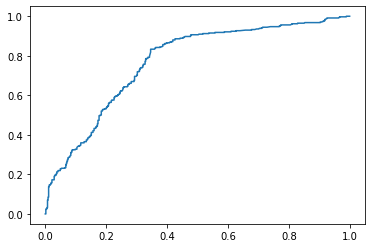

In [72]:
# 1. Create a SVM classifier from scikit-learn:
#    remember that we imported SVC from sklearn.svm!
# (Note: you need to set 'probability' argument to True)
classifier = SVC(C=1.0, probability=True)                 # C를 높이거나 줄이거나 해서 데이터를 편중시키거나 일반화정도로 시키거나 할 수 있음, 10으로 주면 Accuracy가 높아짐

# >> Train the classifier with the training set we preprocessed.
# >> Use fit() method.
classifier.fit(X_train, Y_train)

# >> Check the model accuracy on training set
# >> You can get the mean accuracy of a given dataset and labels
#    with score() method
accuracy = classifier.score(X_train, Y_train) * 100

# 2. Draw ROC curve on training set
# >> First, you need to compute probabilities of each labels for training set.
#    (which means you need to make *model predictions* for training set)
# >> You can do this with predict_proba() method
Y_train_pred = classifier.predict_proba(X_train)[:, 1]

# >> Calculate false positive rates, true positive rates,
#    and area under the curve (AUC) with
#    ground truth labels & predicted probability
FPR, TPR, thresholds = roc_curve(Y_train, Y_train_pred)
AUC = roc_auc_score(Y_train, Y_train_pred)

# Plot ROC curve.
# (hint: use plt.plot() to plot FPR and TPR)
plt.plot(FPR, TPR)

print("Accuracy: ", "{0:.2f}".format(accuracy))
print("Area Under the Curve: ", "{0:.2f}".format(AUC))

# Accuracy가 높아진다는 말은 정확하게 판단한다는 말일 수 있지만, 타이타닉데이터가 지나치게 편중되서 다른 데이터가 들어왔을때 재대로 예측을 못할 수 있기 때문에 이 값만 가지고는 판단 x
# Accuracy가 높고 일반화적이면 좋은 모델임

In [73]:
# Test data prediction
predict = classifier.predict(X_test)
predict = np.round(predict)

# This is how the model predicted
result = test_data.copy()
result["PREDICTION"] = predict
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PREDICTION
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
